<a href="https://colab.research.google.com/github/rjkevin/Web-Scraping/blob/main/Web_Scraping_with_lxml_List_of_Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Introduction to Web Scraping
- In the abscences of an API, web scraping can be a useful tool to extract data from a site. 
- Web scraping can be done using libraries such as BeautifulSoup, Scrapy, Selenium and lxml. Refer [here](https://www.analyticsvidhya.com/blog/2020/04/5-popular-python-libraries-web-scraping/) for pros and cons for each libraries. 
* Why lxml? - Fast and suitable to scrape large datasets, avoid falling for the honeypot trap which may feed user IP and block scraper
* Not all websites are scrapable. Check using /robots.txt after the url
* Challenges:Login requirement, complicated web structure, Honeypot trap, dynamic webpages, CAPTCHA etc.

## Request Module
Client Server Protocol 
* Sends a HTTP request to the server to get info on the URL provided.<br> Server responses back and provides relevant data to the user browser (client)
* HTTP Methods - get () used to request data from the server

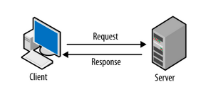

In [2]:
import requests # sends http/1.1 request 
response = requests.get('https://www.w3schools.com/python/module_requests.asp') #requests.get() is a HTTP method that request data for a specific site

response # status code 200 = successful while 404 means otherwise

<Response [200]>

Additional readings:

*   https://www.edureka.co/blog/python-requests-tutorial/
*   https://www.geeksforgeeks.org/python-requests-tutorial/
* https://docs.python-requests.org/en/master/user/quickstart/
* https://www.w3schools.com/tags/ref_httpmethods.asp
* https://realpython.com/python-requests/#getting-started-with-requests



## lxml library
 

*  Imported to process HTML 
*   Parses html from a string. In simpler words, parsing refers to making data understable for further processing.
* It then creates a HTML document tree which enables easy scraping of data using Xpath or CSS selectors


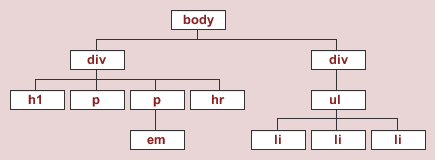 <br>
HTML Document Tree (*Source: http://web.simmons.edu/~grabiner/comm244/weekfour/document-tree.html*)


In [1]:
from lxml import html
element_str = '<p>Hello Darkness my old friend</p>'

tree = html.fromstring(element_str) # converts the string to HTML

y = tree.xpath('//p/text()') 
# xpath locates the element <p> in HTML doc tree.
# text() extracts the text which is sandwich between the opening <p> and closing </p> tags

print(type(tree)) # output shows tree is a html element
print(y) # text is stored in a list

# Basic xpath syntax
# xpath expression in this examples uses predicates. Used to extract specific nodes or node values
# // double forward slashes retrieves ALL p elements in the entire HTML tree document
# / single forward slash retrieves immediate child tags or nodes 


<class 'lxml.html.HtmlElement'>
['Hello Darkness my old friend']


Additional readings:

1.   https://www.educative.io/courses/mastering-xpath-for-selenium/xVyA1VnqlBz
2. https://www.w3schools.com/xml/xml_xpath.asp
3. https://www.w3schools.com/xml/xpath_syntax.asp
4. https://yasoob.me/2018/06/20/an-intro-to-web-scraping-with-lxml-and-python/



## Case Study:
Your Country manager wants you to compile a list of outbound leads of restaurants from hotels to reach out. 

In [39]:
import requests
from lxml import html

webpage = requests.get('https://marriottbonvoyasia.com/R+B/local-discount/BringMarriottHome')
tree = html.fromstring(webpage.content) # parse html from a string / taking the data store in the string and converting it into a html document tree


#use basic xpath expression to extract certain elements or attributes 
restaurant = tree.xpath('//p[@class="restaurantname"]/text()') # selects all the p element with the attribute class that has a value "restaurantname"
hotel = tree.xpath('//span[@class="hotelname"]/text()') # selects all the span element with the class value equals to "hotelname"
contact = tree.xpath('//div[@class]//@data-ctaurl1') # // double forward slashes tells lxml to retrieve ALL the values that matches our descriptions in the document
menu = tree.xpath('//div[@class]//@data-menu')

#Use list comprehension to remove white spaces and new lines
hotels = [x.strip('\n ')for x in hotel]
hotels 

restaurants = [r.strip('\n ')for r in restaurant]
restaurants

contacts = [c.strip('\n ') for c in contact]

menus = [m.strip('\n ') for m in menu]

n_menu = df['Menus'].replace({'':'unavailable'})

#important data into pandas dataframe from lists 
import pandas as pd
df = pd.DataFrame(list(zip(restaurants,hotels,contacts,n_menu)),columns=['Restaurants','Hotels','Existing_channels','Menus']) #combining 2 lists into a dataframe using zip 

df

,Restaurants,Hotels,Existing_channels,Menus
0,"The Drawing Room, The Brasserie, Astor Bar",The St. Regis Kuala Lumpur,http://thestregiskl.beepit.com/,https://cdn-prod.marriottbonvoyasia.com/prod.m...
1,Li Yen,"The Ritz-Carlton, Kuala Lumpur",https://wa.me/c/60186468033,unavailable
2,Shanghai,JW Marriott Hotel Kuala Lumpur,https://wa.me/c/60185918537,unavailable
3,The Living Room,The Westin Kuala Lumpur,https://www.tableapp.com/delivery/the-living-r...,https://cdn-prod.marriottbonvoyasia.com/prod.m...
4,Latest Recipe,Le Méridien Kuala Lumpur,https://lemeridien.oddle.me/en_MY/,unavailable
5,Nook,Aloft Kuala Lumpur Sentral,https://linktr.ee/aloftkls,unavailable
6,Quan's Kitchen,"Four Points by Sheraton Kuala Lumpur, Chinatown",https://wa.me/60125073327,https://cdn-prod.marriottbonvoyasia.com/prod.m...
7,TRACE Restaurant & Bar,Element Kuala Lumpur,https://wa.me/60102670338,https://cdn-prod.marriottbonvoyasia.com/prod.m...
8,Colonial Café,"The Majestic Hotel Kuala Lumpur, Autograph Col...",http://www.wasap.my/60146471060,unavailable
9,Latest Recipe,Le Méridien Putrajaya,https://bungkusit.app.link/uTZKt9pw4gb,https://cdn-prod.marriottbonvoyasia.com/prod.m...


In [ ]:
# Savings dataframe into csv file
df.to_csv('hotel_restaurants.csv') 
